# Longhurst provinces

Flanders Marine Institute (2009). Longhurst Provinces. Available online at https://www.marineregions.org/. Consulted on 2023-11-28.

https://www.marineregions.org/sources.php#longhurst

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import ListedColormap
import glasbey

In [2]:
longhurst = gpd.read_file("../../data/province_shapes/longhurst_v4_2010/Longhurst_world_v4_2010.shp")
output_dir = "output_final/dbscan/interpretation/"

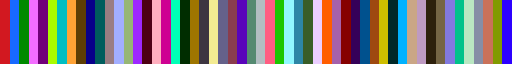

In [3]:
# define color map and ranges
unique_labels = np.sort(longhurst.ProvCode.unique())

colors = glasbey.create_palette(palette_size=len(unique_labels))
cm = ListedColormap(colors)  

cm

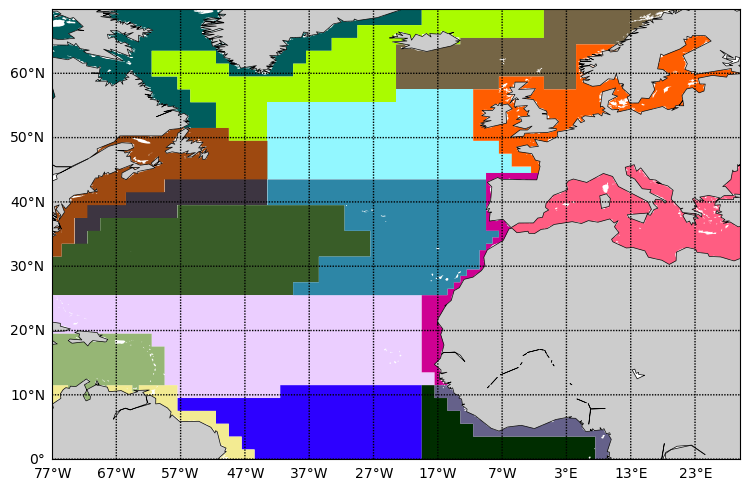

In [4]:
# defining our area of interest
lat_min = 0
lat_max = 70

lon_min = -77
lon_max = 30

# plot settings
factor = 12
mymap = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max)
plt.rcParams["figure.figsize"] = ((lon_max - lon_min)/factor, (lat_max - lat_min)/factor)

# plot
plt.rcParams["figure.figsize"] = (10, 5)
longhurst.plot("ProvCode", cmap=cm, vmin=0, vmax=len(unique_labels))
mymap.drawcoastlines(linewidth=0.5)
mymap.fillcontinents()
mymap.drawparallels(np.arange(int(lat_min),int(lat_max), 10),labels=[1,0,0,0])
mymap.drawmeridians(np.arange(int(lon_min),int(lon_max), 10),labels=[0,0,0,1])
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)
plt.tight_layout()
# plt.savefig(output_dir + "longhurst_surface.png")
plt.show()

<AxesSubplot: >

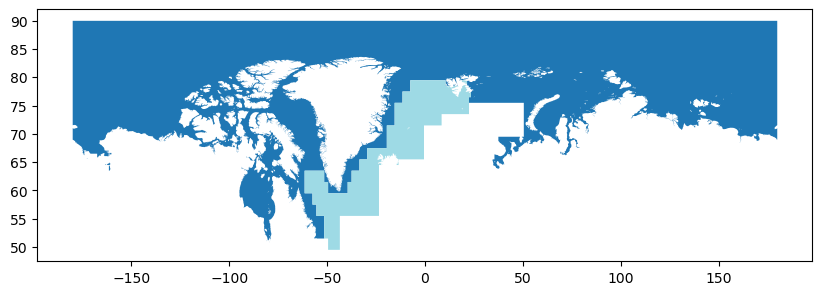

In [5]:
longhurst[longhurst.ProvCode.isin(["ARCT",  "BPLR",# "SARC", 
                                   # "NADR", "GFST", "NASW", 
                                   # "CARB", "NATR",
                                   # "WTRA", "ETRA", "NWCS", "MEDI", "NASE", 
                                  ])].plot(cmap="tab20")

In [6]:
longhurst

,ProvCode,ProvDescr,geometry
0,BPLR,Polar - Boreal Polar Province (POLR),"MULTIPOLYGON (((-161.18426 63.50000, -161.5000..."
1,ARCT,Polar - Atlantic Arctic Province,"MULTIPOLYGON (((-21.51305 64.64409, -21.55945 ..."
2,SARC,Polar - Atlantic Subarctic Province,"MULTIPOLYGON (((11.26472 63.96082, 11.09548 63..."
3,NADR,Westerlies - N. Atlantic Drift Province (WWDR),"POLYGON ((-11.50000 57.50000, -11.50000 56.500..."
4,GFST,Westerlies - Gulf Stream Province,"POLYGON ((-43.50000 43.50000, -43.50000 42.500..."
5,NASW,Westerlies - N. Atlantic Subtropical Gyral Pro...,"POLYGON ((-39.50000 25.50000, -40.50000 25.500..."
6,NATR,Trades - N. Atlantic Tropical Gyral Province (...,"MULTIPOLYGON (((-72.34673 18.53597, -72.36877 ..."
7,WTRA,Trades - Western Tropical Atlantic Province,"POLYGON ((-19.50000 -6.50000, -20.50000 -6.500..."
8,ETRA,Trades - Eastern Tropical Atlantic Province,"POLYGON ((9.50000 -12.50000, 8.50000 -12.50000..."
9,SATL,Trades - South Atlantic Gyral Province (SATG),"POLYGON ((-19.50000 -6.50000, -18.50000 -6.500..."


# Overlay our regions with Longhurst's provinces

In [7]:
my_regions = pd.read_csv("output_final/dbscan/post_processing/re-assigned_A1.csv")

(0.0, 70.0)

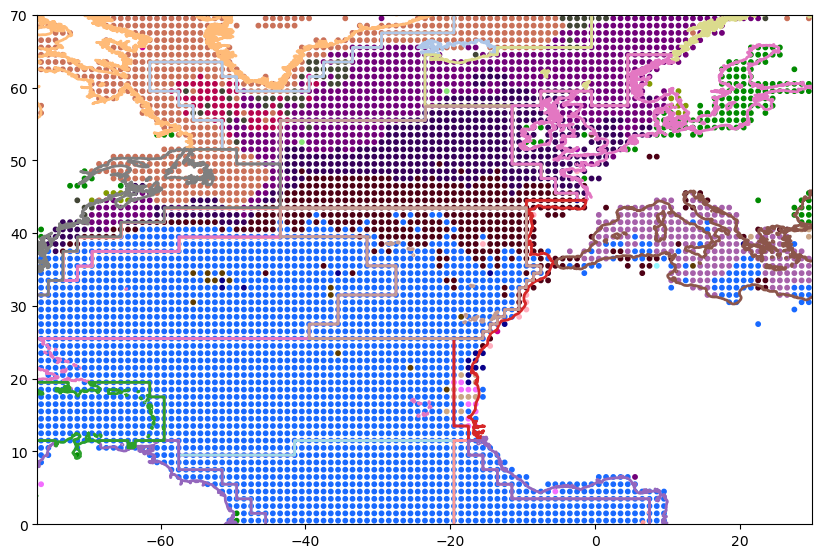

In [8]:
# plot our area of interest
depth = 0.0
my_regions_d = my_regions[my_regions.LEV_M == depth]

# defining out area
lat_min = 0
lat_max = 70

lon_min = -77
lon_max = 30

# plot
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(x=my_regions_d.LONGITUDE, y=my_regions_d.LATITUDE, color=my_regions_d.color, s=10)
longhurst.plot("ProvCode", ax=ax, cmap="tab20", facecolor="none", linewidth=2)

ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)